<a href="https://colab.research.google.com/github/arthurvaz05/Python.Script/blob/master/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install gmplot
!pip install credentials

     |████████████████████████████████| 122kB 3.3MB/s 
  Created wheel for gmplot: filename=gmplot-1.2.0-cp36-none-any.whl size=143765 sha256=ad9f297801b496cc1ddb576655554ce9084bb596d74df1c544432dee88fa18af
  Stored in directory: /root/.cache/pip/wheels/81/6a/76/4dd6a7cc310ba765894159ee84871e8cd55221d82ef14b81a1
Successfully built gmplot


In [0]:
from textblob import TextBlob as tb
import tweepy
import numpy as np
from geopy.geocoders import Nominatim
import gmplot
import credentials
import json
import pandas as pd

In [0]:
geolocator = Nominatim(user_agent="my-application")

In [0]:
consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 


In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [0]:
searchString = "flamengo"

cursor = tweepy.Cursor(api.search, q=searchString, lang="pt",
                       tweet_mode='extended',geocode="-22.9035,-43.2096,1km")

In [14]:
for tweet in cursor.items(): 
  try:
     print(tweet.geo['coordinates'])
  except:
        pass

[-22.9, -43.2]
[-22.9, -43.2]
[-22.90072768, -43.20362896]


In [0]:
coordinates_save = {'latitude': [], 'longitude': []}
for tweets in cursor.items():
  try:
    coordinates_save['latitude'].append(tweets.geo['coordinates'][0])
    coordinates_save['longitude'].append(tweets.geo['coordinates'][1])
  except:
    pass      

In [0]:
gmap = gmplot.GoogleMapPlotter(-22.9035,-43.2096, 12)

gmap.heatmap(coordinates_save['latitude'], coordinates_save['longitude'], radius=20)

gmap.draw("python_heatmap.html")

In [0]:
# O Yahoo! Where On Earth ID para o Brasil é 23424768.
# Veja mais em https://dev.twitter.com/docs/api/1.1/get/trends/place e http://developer.yahoo.com/geo/geoplanet/
BRAZIL_WOE_ID = 23424768
 
brazil_trends = api.trends_place(BRAZIL_WOE_ID)

In [18]:
trends = json.loads(json.dumps(brazil_trends, indent=1))
 
for trend in trends[0]["trends"]:
	print ((trend["name"]).strip("#"))

BereniceDay
Levanter1stWin
QuintaDetremuraSDV
PSIStillLoveYou
Premonição
우리지민_1위했네
Impeachment de Trump
John Ambrose
Anahi e Christian
Takumi Minamino
Raul Prata
Ivan Lins
Peter Kavinsky
Ester 7
Antas
Van der Sar
Borgo
Mauro Galvão
Capelo
Médicos
Sobre Star Wars
EU PERDI
flávio bolsonaro e queiroz
Papuda
Derrick Barry
Familicia
Hyoran
J J Abrams
Carris
Itamaraty
Ben Solo
ponte hercílio luz
Liverpool
Monterrey
TicTacFlavioBolsonaro
StarWarsAAscensaoSkywalker
3YearsWithCamila
bomdiafoxquinta
GreaterWithWonho
98esportes
RiseOfTheSkywalker
sportvnews
JiminMostPreferredIdol2019
VetaFundaoBolsonaro
EstAnahiPodcast
jpmorningshow
HappyBirthdayJakeGyllenhaal
PRC30Anos
bdmg
Amigos20Anos


In [0]:
public_tweets = api.search('\"{}\" -filter:retweets'.format('Flamengo'),tweet_mode='extended',count = 100, lang = 'pt')

In [0]:
tweets = [] # Lista vazia para armazenar scores
criacao = []
texto = []
retweet = []
coordenadas = []
user_nome = []
user_apelido = []
user_contas_favoritas = []
user_contas_seguidores = []
user_contas_amigos = []
user_contas_status_twitter = []

for tweet in public_tweets:
  criacao.append(tweet._json['created_at'])
  texto.append(tweet._json['full_text'])
  retweet.append(tweet._json['retweet_count'])
  coordenadas.append(tweet._json['coordinates'])
  user_nome.append(tweet._json['user']['name'])
  user_apelido.append(tweet._json['user']['screen_name'])
  user_contas_favoritas.append(tweet._json['user']['favourites_count'])
  user_contas_seguidores.append(tweet._json['user']['followers_count'])
  user_contas_amigos.append(tweet._json['user']['friends_count'])
  user_contas_status_twitter.append(tweet._json['user']['statuses_count'])

In [0]:
data = {'criacao': criacao,'texto': texto,'retweet':retweet,'coordenadas':coordenadas,
        'user_nome':user_nome,'user_apelido':user_apelido,
        'user_contas_favoritas':user_contas_favoritas, 'user_contas_seguidores':user_contas_seguidores,
        'user_contas_amigos':user_contas_amigos, 'user_contas_status_twitter':user_contas_status_twitter}

In [0]:
twitter_df = pd.DataFrame(data)

In [23]:
" ".join(filter(lambda x:x[0]!='@', twitter_df.texto[0].split()))

'Gustavo Henrique rejeita Palmeiras e Corinthians e troca Santos pelo Flamengo https://t.co/zIJUqDk5cO'

In [0]:
def tirar_id(y):
  z = " ".join(filter(lambda x:x[0]!='@', y.split()))
  return z

In [0]:
twitter_df.texto = twitter_df.texto.map(tirar_id)

In [26]:
twitter_df.head(5)

,criacao,texto,retweet,coordenadas,user_nome,user_apelido,user_contas_favoritas,user_contas_seguidores,user_contas_amigos,user_contas_status_twitter
0,Thu Dec 19 13:25:28 +0000 2019,Gustavo Henrique rejeita Palmeiras e Corinthia...,0,None,Gazeta Esportiva,gazetaesportiva,6728,104494,881,119336
1,Thu Dec 19 13:25:26 +0000 2019,Agora não tem Flamengo pra ser usado de trampo...,0,None,Raylson Dutra,Raypdutra,828,45,93,1027
2,Thu Dec 19 13:25:25 +0000 2019,A hegemonia do Fla incomoda a mídia paulista! ...,0,None,Leonardo Paradela,Leo_Paradela,2212,106,151,447
3,Thu Dec 19 13:25:25 +0000 2019,"Mano flamengo esse ano está imbatível, vtnc, q...",0,None,Fé nas mlc,giovannaabreu71,4402,262,90,8758
4,Thu Dec 19 13:25:23 +0000 2019,Esquece o Flamengo cara vcs nem tem passaporte...,0,None,Ranieri Giuliano Fernandes,RanieriGiulian3,19,3,130,25


In [27]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
twitter_word = twitter_df.texto.map(word_tokenize)

In [0]:
#twitter_word

In [30]:
myString = ''
for x in twitter_word:
    myString += ",".join(x)
#print(myString)

Gustavo,Henrique,rejeita,Palmeiras,e,Corinthians,e,troca,Santos,pelo,Flamengo,https,:,//t.co/zIJUqDk5cOAgora,não,tem,Flamengo,pra,ser,usado,de,trampolim,salarial,...A,hegemonia,do,Fla,incomoda,a,mídia,paulista,!,Em,situações,semelhantes,vejam,a,diferença,de,enfoque,da,no,Twitter,divulgando,o,resultado,das,duas,semifinais,do,Mundial,de,Clubes,!,🤬,Caros,editores,evitem,vocês,o,vexame,da,inveja,!,#,Flamengo,#,MundialDeClubes2019,https,:,//t.co/oXRE4B3HKVMano,flamengo,esse,ano,está,imbatível,,,vtnc,,,que,orgulho,mano,😍Esquece,o,Flamengo,cara,vcs,nem,tem,passaporte,não,ganha,nada,faz,30,anos,e,quer,falar,de,FlamengoEM,NOVEMBRO,LÁ,NO,PERU,GANHAR,DO,RIVER,FOI,FODA,,,GABIGOL,AOS,91,FICOU,MARCADO,NA,HISTÓRIA,E,NO,RIO,NÃO,TEM,OUTRO,IGUAL,,,LIVERPOOL,TE,ESPERO,NA,FINAL,,,E,AGORA,SEU,POUCO,DIZ,CHEIRINHO,É,MEU,OVO,,,DÁ-LHE,DÁ-LHE,DÁ-LHE,MENGO,,,PRA,CIMA,DELES,FLAMENGO,❤,https,:,//t.co/hbqXT91xOTFlamengo,já,trouxe,o,Peralta,.,Então,Arrascaeta,não,valeu,?Eu,tmbm,😂😂Porquê,que,toda,contratação,do,Flame

In [0]:
twitter_word = word_tokenize(myString)

In [0]:
twitter_word = [x for x in twitter_word if x not in stopwords]

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 

In [0]:
comment_words = ' '
#stopwords = set(stopwords) 
  
for val in twitter_df.texto: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      if words not in stopwords:
        comment_words = comment_words + words + ' '

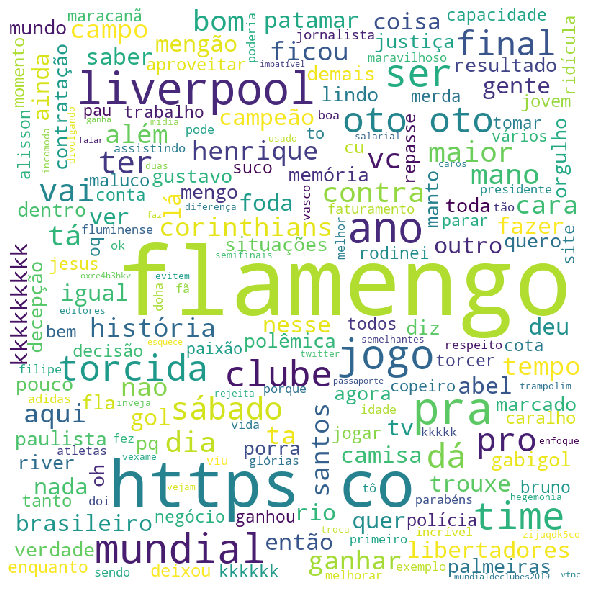

In [35]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
palavras = ['ser', 'todo','pode','entra','tudo','deu','entender','precisa','deve',
            'vc','né','https','msm','vcs','pq', 'co','aqui']
for palavra in palavras:
  stopwords.append(palavra)

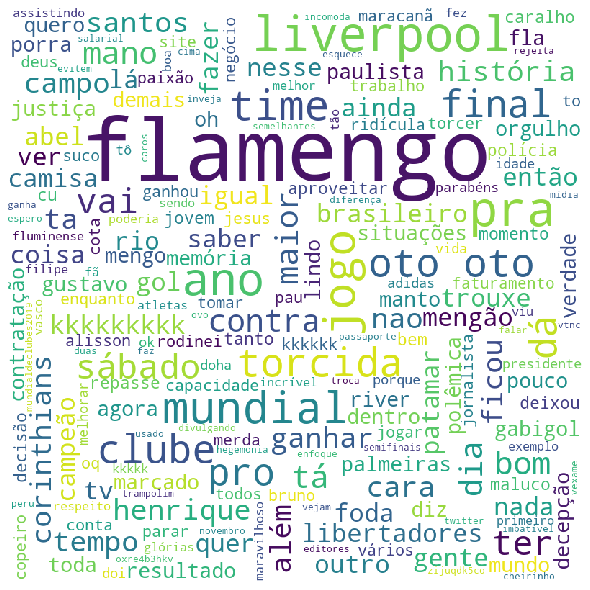

In [37]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 